# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables\
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_response_data

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_response_data

# Compute current value of my crpto
btc_current_value = btc_response_data['data']['1']['quotes']['USD']['price']
eth_current_value = eth_response_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_current_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_current_value:0.2f}")

The current value of your 1.2 BTC is $41287.00
The current value of your 5.3 ETH is $2433.35


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2024-01-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df
                                  
# Reorganize the DataFrame

# Separate ticker data
AGG = df_portfolio [df_portfolio ['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio [df_portfolio ['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                           close   high      low trade_count   open   volume   
timestamp                                                                      
2024-01-19 05:00:00+00:00  98.02  98.02  97.6714       32021  97.89  9126091   

                                        SPY                                \
                               vwap   close    high       low trade_count   
timestamp                                                                   
2024-01-19 05:00:00+00:00  97.90435  482.43  482.72  476.5374      607546   

                                                         
                             open     volume       vwap  
timestamp                                                
2024-01-19 05:00:00+00:00  477.65  110780877  479.96547

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.02
Current SPY closing price: $482.43


/var/folders/s9/3nb3hsgs3xddn3d1jqdzx6fw0000gn/T/ipykernel_57158/4254263255.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["AGG"]["close"])
/var/folders/s9/3nb3hsgs3xddn3d1jqdzx6fw0000gn/T/ipykernel_57158/4254263255.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["SPY"]["close"])


In [10]:
# Compute the current value of shares
agg_current_value = my_agg * agg_close_price
spy_current_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_current_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_current_value:0.2f}")

The current value of your 50 SPY shares is $24121.50
The current value of your 200 AGG shares is $19604.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_financial_assets = btc_current_value + eth_current_value
stockbond_financial_assets = agg_current_value + agg_current_value

value_data = {
    'amount': [crypto_financial_assets,stockbond_financial_assets],
    'asset': ["crypto","shares"]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,43720.35
shares,39208.00


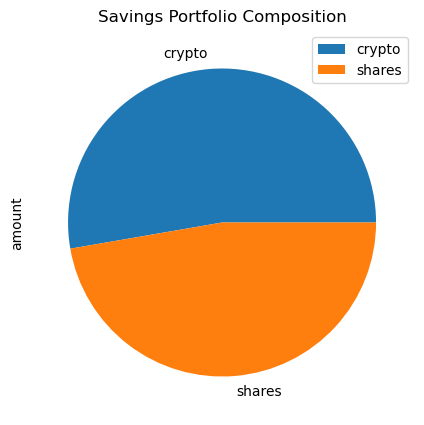

In [12]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y = 'amount' , title= "Savings Portfolio Composition", figsize = (5,5))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

#Validate saving health
#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
if total_savings > emergency_fund:
    print(f"Congrats! You have enough money in the emergency fund.")
    
#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif total_savings == emergency_fund:
    print(f"Congrats! You have reached this financial goal.")
          
#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    print(f"The ${emergency_fund - total_savings:0.2f} away from achieving the financial goal. Continue saving!")

Congrats! You have enough money in the emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2021-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-19', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_five_year = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date,
    end= end_date,
).df

# Reorganize the DataFrame
df_five_year

# Separate ticker data
AGG = df_five_year[df_five_year["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_five_year[df_five_year["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_five_year = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_five_year

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2021-01-19 05:00:00+00:00  117.41  117.4200  117.2200       17042  117.27   
2021-01-20 05:00:00+00:00  117.42  117.4300  117.3100       14866  117.35   
2021-01-21 05:00:00+00:00  117.25  117.2985  117.1400       14783  117.22   
2021-01-22 05:00:00+00:00  117.25  117.3200  117.1900       13241  117.29   
2021-01-25 05:00:00+00:00  117.55  117.5600  117.3600       18540  117.39   
...                           ...       ...       ...         ...     ...   
2024-01-12 05:00:00+00:00   99.10   99.3600   98.9600       26760   99.14   
2024-01-16 05:00:00+00:00   98.36   98.8500   98.2701       44947   98.72   
2024-01-17 05:00:00+00:00   98.09   98.2099   97.9400       30879   98.16   
2024-01-18 05:00:00+00:00   98.00   98.1950   97.8900       26014   98.16   
2024-01-19 05:00:00+00:00   98.02   98.0200   97.6714       32021   97.89   

                                                    SPY                      \
                             volume        vwap   close      high       low   
timestamp                                                                     
2021-01-19 05:00:00+00:00   9383806  117.349437  378.64  379.2300  376.7500   
2021-01-20 05:00:00+00:00   8536821  117.397715  383.80  384.7900  380.6900   
2021-01-21 05:00:00+00:00   9674903  117.249486  384.15  384.9500  383.2500   
2021-01-22 05:00:00+00:00   3649337  117.265462  382.82  384.1256  381.8350   
2021-01-25 05:00:00+00:00   4186419  117.481754  384.54  384.7700  378.4600   
...                             ...         ...     ...       ...       ...   
2024-01-12 05:00:00+00:00   6359407   99.109776  476.68  478.6000  475.2300   
2024-01-16 05:00:00+00:00  14489797   98.453263  474.93  476.6098  473.0600   
2024-01-17 05:00:00+00:00   8977600   98.087413  472.29  472.7900  469.8700   
2024-01-18 05:00:00+00:00  10575151   98.017836  476.49  477.0600  472.4200   
2024-01-19 05:00:00+00:00   9126091   97.904350  482.43  482.7200  476.5374   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2021-01-19 05:00:00+00:00      295712  378.34   52504155  378.107011  
2021-01-20 05:00:00+00:00      295871  381.11   63340450  382.633281  
2021-01-21 05:00:00+00:00      248102  384.49   48716569  384.236146  
2021-01-22 05:00:00+00:00      250237  382.25   53194026  383.195009  
2021-01-25 05:00:00+00:00      445948  383.67   72021578  382.798224  
...                               ...     ...        ...         ...  
2024-01-12 05:00:00+00:00      470201  477.84   57998192  476.587861  
2024-01-16 05:00:00+00:00      592233  475.26   85015070  474.916972  
2024-01-17 05:00:00+00:00      520417  471.82   68843871  471.773122  
2024-01-18 05:00:00+00:00      558708  474.01   91856348  474.745846  
2024-01-19 05:00:00+00:00      607546  477.65  110780877  479.965470  

[756 rows x 14 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_five_year,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2021-01-19 05:00:00+00:00  117.41  117.4200  117.22       17042  117.27   
2021-01-20 05:00:00+00:00  117.42  117.4300  117.31       14866  117.35   
2021-01-21 05:00:00+00:00  117.25  117.2985  117.14       14783  117.22   
2021-01-22 05:00:00+00:00  117.25  117.3200  117.19       13241  117.29   
2021-01-25 05:00:00+00:00  117.55  117.5600  117.36       18540  117.39   

                                                                SPY            \
                            volume        vwap daily_return   close      high   
timestamp                                                                       
2021-01-19 05:00:00+00:00  9383806  117.349437          NaN  378.64  379.2300   
2021-01-20 05:00:00+00:00  8536821  117.397715     0.000085  383.80  384.7900   
2021-01-21 05:00:00+00:00  9674903  117.249486    -0.001448  384.15  384.9500   
2021-01-22 05:00:00+00:00  3649337  117.265462     0.000000  382.82  384.1256   
2021-01-25 05:00:00+00:00  4186419  117.481754     0.002559  384.54  384.7700   

                                                                              \
                               low trade_count    open    volume        vwap   
timestamp                                                                      
2021-01-19 05:00:00+00:00  376.750      295712  378.34  52504155  378.107011   
2021-01-20 05:00:00+00:00  380.690      295871  381.11  63340450  382.633281   
2021-01-21 05:00:00+00:00  383.250      248102  384.49  48716569  384.236146   
2021-01-22 05:00:00+00:00  381.835      250237  382.25  53194026  383.195009   
2021-01-25 05:00:00+00:00  378.460      445948  383.67  72021578  382.798224   

                                        
                          daily_return  
timestamp                               
2021-01-19 05:00:00+00:00          NaN  
2021-01-20 05:00:00+00:00     0.013628  
2021-01-21 05:00:00+00:00     0.000912  
2021-01-22 05:00:00+00:00    -0.003462  
2021-01-25 05:00:00+00:00     0.004493

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 110.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 120.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 130.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 140.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 150.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 160.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 170.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 180.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 190.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 200.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 210.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 220.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 230.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 240.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 250.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 260.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 270.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 280.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 290.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 300.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 310.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 320.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 330.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 340.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 350.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 360.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 370.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 380.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 390.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 400.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 410.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 420.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 430.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 440.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 450.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 460.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 470.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 480.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

Running Monte Carlo simulation number 490.


/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kimberlyrodriguez/Desktop/FINTECH/HOMEWORK/CHALLENGE_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999921,1.007009,0.987371,1.004950,1.000335,0.996122,1.002914,1.004567,1.001190,1.002957,...,0.998875,1.009758,1.014352,0.995041,1.001853,1.007732,0.995856,0.996018,1.008186,1.006317
2,1.004167,1.002918,0.984418,1.006098,0.997870,0.999542,0.993890,1.020725,1.001222,0.997345,...,0.997287,1.002147,1.013527,0.988923,0.994599,1.005017,0.992542,0.992638,1.008355,1.013280
3,1.004560,1.001403,0.990028,1.004994,1.001386,0.997952,0.999141,1.016302,1.001611,1.001255,...,1.000832,1.006864,1.016087,0.992867,0.990534,1.014961,0.993009,0.992305,1.012462,1.013300
4,1.004574,0.996686,0.984965,1.015603,1.000182,1.006782,1.001028,1.014783,1.005140,1.004792,...,1.000129,1.004760,1.015281,0.994309,0.992767,1.017252,0.998950,0.991380,1.013996,1.013869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.888596,2.546744,0.914354,0.620281,1.472993,1.269766,0.855215,1.249756,0.961823,1.212001,...,1.305070,1.414172,1.358749,0.680491,1.782545,0.906484,1.341111,1.307303,1.143668,1.752153
7557,0.876880,2.519593,0.903495,0.622548,1.465813,1.269827,0.854559,1.252075,0.960019,1.211695,...,1.313218,1.411803,1.361802,0.679644,1.787046,0.912668,1.330011,1.315138,1.144228,1.747486
7558,0.879284,2.505182,0.904016,0.621660,1.463657,1.272651,0.855186,1.247208,0.963317,1.208574,...,1.309593,1.415556,1.360550,0.676766,1.778645,0.907967,1.319345,1.312032,1.145218,1.736368
7559,0.881844,2.514878,0.903357,0.619936,1.467737,1.256869,0.848771,1.243007,0.963566,1.212381,...,1.319280,1.417644,1.370445,0.673856,1.789796,0.899818,1.318950,1.298839,1.151701,1.730268


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

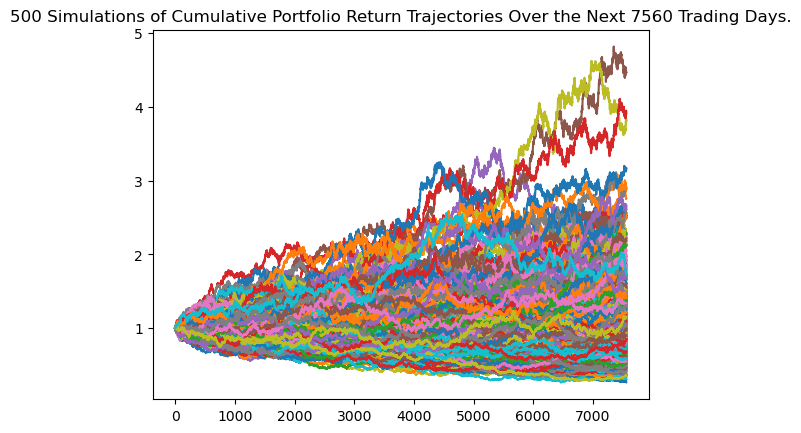

In [19]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

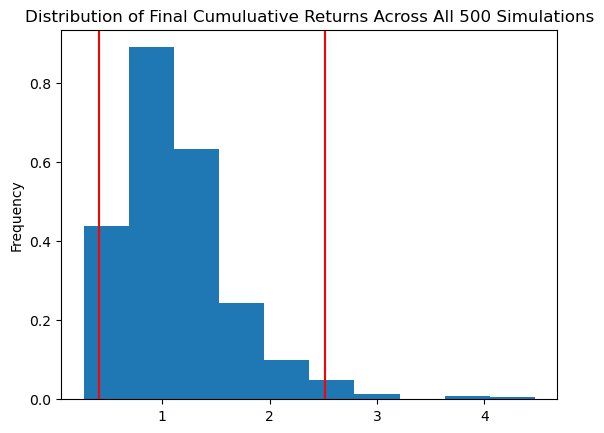

In [20]:
# Plot probability distribution and confidence intervals
MC_thirty_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_table = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_table)

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
first_ci_lower = round(tbl[8]*20000,2)
first_ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
second_ci_lower = round(tbl[8]*30000,2)
second_ci_upper = round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")